In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [72]:
stock_data=pd.read_excel(r"C:\Users\anant\Downloads\TATAMOTORS_Yahoo!2010.xlsx")


In [73]:
stock_data.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
3324,2023-06-12,567.000000,568.900024,560.650024,564.150024,564.150024,7599572.0
3325,2023-06-13,567.700012,571.049988,560.750000,562.200012,562.200012,12845897.0
3326,2023-06-14,566.000000,571.200012,564.000000,570.299988,570.299988,12713256.0
3327,2023-06-15,571.799988,575.000000,567.750000,568.450012,568.450012,12475759.0
3328,2023-06-16,569.650024,572.200012,566.049988,569.799988,569.799988,8736313.0


In [74]:
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [75]:
stock_data.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [76]:
stock_data['Open'].fillna(stock_data['Open'].mean(), inplace=True)
stock_data['Close'].fillna(stock_data['Close'].mean(), inplace=True)
stock_data['Low'].fillna(stock_data['Low'].mean(), inplace=True)
stock_data['High'].fillna(stock_data['High'].mean(), inplace=True)
stock_data['Adj Close'].fillna(stock_data['Adj Close'].mean(), inplace=True)
stock_data['Volume'].fillna(stock_data['Volume'].mean(), inplace=True)



In [77]:
stock_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [78]:
stock_data.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [79]:
import pandas_ta as ta

stock_data['EMA'] = ta.ema(stock_data['Close'])
stock_data['SMA'] = ta.sma(stock_data['Close'])
stock_data['RSI'] = ta.rsi(stock_data['Close'])
stock_data['obv'] = ta.obv(stock_data['Close'], stock_data['Volume'])


In [80]:
# Calculate MACD
macd = ta.macd(stock_data['Close'])
macd

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
3324,18.781744,1.886404,16.895340
3325,18.616444,1.376883,17.239561
3326,18.920934,1.345098,17.575836
3327,18.796294,0.976367,17.819927


In [81]:
stock_data['macd_line'] = macd['MACD_12_26_9']
stock_data['signal_line'] = macd['MACDs_12_26_9']
stock_data['macd_histogram'] = macd['MACDh_12_26_9']

In [82]:
bb = ta.bbands(stock_data['Close'])
bb


,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,153.271442,159.374552,165.477662,7.658826,0.246781
...,...,...,...,...,...
3324,553.749877,561.970007,570.190138,2.925470,0.632602
3325,557.782268,563.260010,568.737751,1.945014,0.403245
3326,556.576390,563.730005,570.883620,2.537958,0.959207
3327,558.865301,565.480005,572.094709,2.339501,0.724500


In [83]:
stock_data['bb_upper'] = bb['BBL_5_2.0']
stock_data['bb_lower'] = bb['BBM_5_2.0']
stock_data['bb_middle'] = bb['BBU_5_2.0']

In [84]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,EMA,SMA,RSI,obv,macd_line,signal_line,macd_histogram,bb_upper,bb_lower,bb_middle
0,2010-01-04,156.303482,164.040497,156.184769,163.535919,153.140793,27906448.0,NaN,NaN,NaN,2.790645e+07,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,162.259598,167.147186,153.246277,160.686478,150.472473,23669317.0,NaN,NaN,NaN,4.237131e+06,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,162.200241,162.932388,159.311234,160.933823,150.704086,14990820.0,NaN,NaN,NaN,1.922795e+07,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,161.171280,161.923218,154.344498,155.432831,145.552795,22722030.0,NaN,NaN,NaN,-3.494079e+06,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,156.323273,159.251862,155.343781,156.283707,146.349564,16495776.0,NaN,NaN,NaN,1.300170e+07,NaN,NaN,NaN,153.271442,159.374552,165.477662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,2023-06-12,567.000000,568.900024,560.650024,564.150024,564.150024,7599572.0,550.024782,547.230005,72.689479,6.824794e+09,18.781744,16.895340,1.886404,553.749877,561.970007,570.190138
3325,2023-06-13,567.700012,571.049988,560.750000,562.200012,562.200012,12845897.0,552.238460,551.570007,71.004780,6.811949e+09,18.616444,17.239561,1.376883,557.782268,563.260010,568.737751
3326,2023-06-14,566.000000,571.200012,564.000000,570.299988,570.299988,12713256.0,555.522374,555.970007,73.728524,6.824662e+09,18.920934,17.575836,1.345098,556.576390,563.730005,570.883620
3327,2023-06-15,571.799988,575.000000,567.750000,568.450012,568.450012,12475759.0,557.872854,559.295007,72.063493,6.812186e+09,18.796294,17.819927,0.976367,558.865301,565.480005,572.094709


In [85]:
len(stock_data['EMA']),
len(stock_data['SMA']),
len(stock_data['RSI']),
len(stock_data['obv']),
len(stock_data['bb_upper']),
len(stock_data['bb_lower']),
len(stock_data['bb_middle']),
len(stock_data["macd_line"]),
len(stock_data["signal_line"]),
len(stock_data["macd_histogram"])

3329

In [86]:
stock_data.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
EMA                9
SMA                9
RSI               14
obv                0
macd_line         25
signal_line       33
macd_histogram    33
bb_upper           4
bb_lower           4
bb_middle          4
dtype: int64

In [87]:
stock_data['EMA'].fillna(stock_data['EMA'].mean(), inplace=True)
stock_data['SMA'].fillna(stock_data['SMA'].mean(), inplace=True)
stock_data['RSI'].fillna(stock_data['RSI'].mean(), inplace=True)
stock_data['bb_upper'].fillna(stock_data['bb_upper'].mean(), inplace=True)
stock_data['bb_lower'].fillna(stock_data['bb_lower'].mean(), inplace=True)
stock_data['bb_middle'].fillna(stock_data['bb_middle'].mean(), inplace=True)
stock_data['macd_line'].fillna(stock_data['macd_line'].mean(), inplace=True)
stock_data['signal_line'].fillna(stock_data['signal_line'].mean(), inplace=True)
stock_data['macd_histogram'].fillna(stock_data['macd_histogram'].mean(), inplace=True)



In [88]:
stock_data.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
EMA               0
SMA               0
RSI               0
obv               0
macd_line         0
signal_line       0
macd_histogram    0
bb_upper          0
bb_lower          0
bb_middle         0
dtype: int64

In [89]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,EMA,SMA,RSI,obv,macd_line,signal_line,macd_histogram,bb_upper,bb_lower,bb_middle
0,2010-01-04,156.303482,164.040497,156.184769,163.535919,153.140793,27906448.0,320.150938,320.140684,50.775938,2.790645e+07,0.792224,0.771870,0.020286,307.773368,320.201693,332.630017
1,2010-01-05,162.259598,167.147186,153.246277,160.686478,150.472473,23669317.0,320.150938,320.140684,50.775938,4.237131e+06,0.792224,0.771870,0.020286,307.773368,320.201693,332.630017
2,2010-01-06,162.200241,162.932388,159.311234,160.933823,150.704086,14990820.0,320.150938,320.140684,50.775938,1.922795e+07,0.792224,0.771870,0.020286,307.773368,320.201693,332.630017
3,2010-01-07,161.171280,161.923218,154.344498,155.432831,145.552795,22722030.0,320.150938,320.140684,50.775938,-3.494079e+06,0.792224,0.771870,0.020286,307.773368,320.201693,332.630017
4,2010-01-08,156.323273,159.251862,155.343781,156.283707,146.349564,16495776.0,320.150938,320.140684,50.775938,1.300170e+07,0.792224,0.771870,0.020286,153.271442,159.374552,165.477662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,2023-06-12,567.000000,568.900024,560.650024,564.150024,564.150024,7599572.0,550.024782,547.230005,72.689479,6.824794e+09,18.781744,16.895340,1.886404,553.749877,561.970007,570.190138
3325,2023-06-13,567.700012,571.049988,560.750000,562.200012,562.200012,12845897.0,552.238460,551.570007,71.004780,6.811949e+09,18.616444,17.239561,1.376883,557.782268,563.260010,568.737751
3326,2023-06-14,566.000000,571.200012,564.000000,570.299988,570.299988,12713256.0,555.522374,555.970007,73.728524,6.824662e+09,18.920934,17.575836,1.345098,556.576390,563.730005,570.883620
3327,2023-06-15,571.799988,575.000000,567.750000,568.450012,568.450012,12475759.0,557.872854,559.295007,72.063493,6.812186e+09,18.796294,17.819927,0.976367,558.865301,565.480005,572.094709


In [90]:
X = stock_data.drop(["Close", "Date"], axis=1)
y= stock_data["Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
X.dropna(inplace=True)
y.dropna(inplace=True)
X.describe()

,Open,High,Low,Adj Close,Volume,EMA,SMA,RSI,obv,macd_line,signal_line,macd_histogram,bb_upper,bb_lower,bb_middle
count,3329.000000,3329.000000,3329.000000,3329.000000,3.329000e+03,3329.000000,3329.000000,3329.000000,3.329000e+03,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000
mean,320.717999,325.309989,315.589898,318.183029,2.036899e+07,320.150938,320.140684,50.775938,1.760984e+09,0.792224,0.771870,0.020286,307.773368,320.201693,332.630017
std,129.403633,130.507359,127.975449,130.639425,2.664805e+07,128.002056,128.192028,12.408434,2.048673e+09,9.158858,8.635077,2.673706,126.344896,128.657317,132.177634
min,66.500000,66.900002,63.500000,65.300003,0.000000e+00,70.440729,68.620001,12.647159,-6.068876e+08,-24.141799,-22.254079,-17.954875,20.879262,67.830000,71.536535
25%,201.211807,204.199753,198.800003,194.177643,6.948329e+06,201.658689,201.648120,42.500273,7.125529e+08,-4.756237,-4.541452,-1.580371,193.987565,202.236810,209.745644
50%,312.547607,316.600006,307.000000,310.250000,1.154949e+07,312.108874,310.715002,50.812453,8.880179e+08,0.732384,0.771870,0.020286,300.233846,310.123615,324.011107
75%,431.850006,436.171631,425.649994,430.549988,2.141293e+07,430.231055,429.429999,59.467427,1.152056e+09,6.211957,5.957543,1.658610,417.255476,431.409998,442.255952
max,600.212097,605.901123,589.873047,597.892273,3.905778e+08,578.056893,584.614435,91.791621,6.829361e+09,50.586270,44.447164,18.109018,575.533181,587.884363,721.552349


## RandomForest Regressor


In [93]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [94]:
rf.score(X_test,y_test)

0.9998504455852848

In [95]:
#The first metric we will call upon is the mean absolute error
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred)

0.9578527681831775

This returns a value of .9578 This informs us the average absolute error between the actual measurement (y_test)
 and the predicted measurement (y_pred), and is measured in the same units as the target feature.

In [96]:
#RMSE3

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = mse**0.5
rmse


1.5706357277515404

The RMSE equation provides us with an idea of the prediction error magnitude.

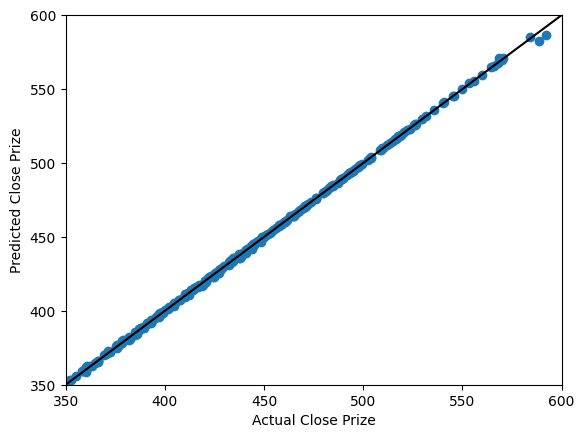

In [98]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlim(350, 600)
plt.ylim(350, 600)
plt.ylabel('Predicted Close Prize')
plt.xlabel('Actual Close Prize')
plt.plot([350, 600], [350, 600], 'black') #1 to 1 line

## Linear Regression


In [99]:
from sklearn.linear_model import LinearRegression


In [100]:
lm=LinearRegression()
lm.fit(X_train,y_train)
Y_pred = lm.predict(X_test)

In [101]:
lm.score(X_test,y_test)

0.9997833540523754

In [102]:
#The first metric we will call upon is the mean absolute error
from sklearn import metrics
metrics.mean_absolute_error(y_test, Y_pred)

1.5088173232342534

In [103]:
#RMSE
mse = metrics.mean_squared_error(y_test, Y_pred)
rmse = mse**0.5
rmse

1.8903888126056838

## Support Vector Regression

In [104]:
#from sklearn.svm import SVR
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler


In [105]:
#SVR = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

#SVR.fit(X_train,y_train)
#Y_PRED = SVR.predict(X_test)
#SVR.score(X_test,y_test)
#metrics.mean_absolute_error(y_test, Y_PRED)
#mse = metrics.mean_squared_error(y_test, Y_PRED)
#rmse = mse**0.5
#rmse

## XGBOOST


In [108]:
import xgboost as xgb


In [109]:
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [110]:
Y_Pred = xgb_reg.predict(X_test)


In [111]:
xgb_reg.score(X_test,y_test)

0.999839103156478

In [112]:
metrics.mean_absolute_error(y_test, Y_Pred)

1.1969041766515047

In [113]:
mse = metrics.mean_squared_error(y_test, Y_Pred)
rmse = mse**0.5
rmse

1.629107021782612

## ENSEMBLE Method


In [114]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb


In [115]:
Model1=RandomForestRegressor(n_estimators=100,random_state=42)
Model2=LinearRegression()
Model3 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)


In [116]:
Model1.fit(X_train, y_train)
Model2.fit(X_train, y_train)
Model3.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [67]:
pred1 = Model1.predict(X_test)
pred2 = Model2.predict(X_test)
pred3 = Model3.predict(X_test)

In [68]:
ensemble_pred = (pred1 + pred2  + pred3) / 3


In [117]:
metrics.mean_absolute_error(y_test, ensemble_pred)

0.9936975134084288

In [118]:
mse = metrics.mean_squared_error(y_test, ensemble_pred)
rmse = mse**0.5
rmse

1.3720553060391183

## StockMarket Analysis Using LSTM


In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_ta as ta

In [120]:
Data=yf.download(tickers='TATAMOTORS.NS',start='2010-01-11',end='2023-06-1')

[*********************100%***********************]  1 of 1 completed


In [121]:
Data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-11,158.104172,158.104172,154.789719,156.352951,146.414413,11776347
2010-01-12,155.927521,157.708420,154.552277,155.591125,145.701004,10657130
2010-01-13,155.333893,157.193939,152.781265,155.323990,145.450851,17659374
2010-01-14,155.531769,156.778397,154.255447,154.769943,144.932053,8626217
2010-01-15,154.938126,158.994629,153.355118,157.748001,147.720764,18955837
...,...,...,...,...,...,...
2023-05-25,518.000000,518.000000,509.100006,514.849976,514.849976,11543712
2023-05-26,514.900024,519.750000,512.200012,518.450012,518.450012,8360570
2023-05-29,525.000000,525.099976,519.700012,521.450012,521.450012,6596504


In [122]:
Data['RSI']=ta.rsi(Data.Close, length=15)
Data['EMAF']=ta.ema(Data.Close, length=20)
Data['EMAM']=ta.ema(Data.Close, lenghth=100)
Data['EMAS']=ta.ema(Data.Close, lenghth=150)

Data['Target']=Data['Adj Close']-Data.Open #Difference Between current open and future close price
Data['Target']=Data['Target'].shift(-1)

Data['Targetclass']=[1 if Data.Target[i]>0 else 0 for i in range(len(Data))]

Data['TargetNextClose']=Data['Adj Close'].shift(-1)

Data.dropna(inplace=True)
Data.reset_index(inplace=True)
Data.drop(['Volume','Close','Date'],axis=1,inplace=True)

In [123]:
Data_set=Data.iloc[:,0:11] #.values
pd.set_option('display.max_columns', None)
Data_set.head(20)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,Targetclass,TargetNextClose
0,133.577255,136.119980,125.404907,124.752907,24.889116,148.427961,140.352521,140.352521,-6.310722,0,125.327324
1,131.638046,136.139771,131.400604,125.327324,26.429205,147.038106,139.167424,139.167424,-11.451050,0,124.095078
2,135.546127,137.327026,131.984329,124.095078,25.239737,145.655296,137.958547,137.958547,-6.118340,0,127.449013
3,133.567352,136.911484,133.280441,127.449013,33.913397,144.745286,137.620664,137.620664,-10.719879,0,126.587357
4,137.307236,138.989197,134.655685,126.587357,32.863879,143.834312,137.176917,137.176917,-5.668320,0,130.293350
5,135.961670,140.295197,135.546127,130.293350,41.243294,143.387006,137.533405,137.533405,-8.652481,0,131.840591
6,140.493073,142.867599,140.107208,131.840591,44.350295,143.139661,138.125493,138.125493,-9.848663,0,131.534851
7,141.383514,142.452057,139.206863,131.534851,43.859277,142.884779,138.550566,138.550566,-9.633194,0,129.672607
8,139.305801,140.374344,136.021042,129.672607,40.903854,142.464773,138.536775,138.536775,-9.847626,0,130.645447
9,140.493073,141.423096,138.820999,130.645447,43.051668,142.183707,138.714376,138.714376,-8.662369,0,129.654053


In [124]:
from sklearn.preprocessing import MinMaxScaler
SC=MinMaxScaler(feature_range=(0,1)) 
Data_set_scaled=SC.fit_transform(Data_set)
print(Data_set_scaled)

[[0.1256806  0.1284227  0.11760653 ... 0.34148264 0.         0.11270783]
 [0.12204716 0.12845942 0.12899711 ... 0.27420086 0.         0.11039416]
 [0.12936961 0.13066211 0.13010607 ... 0.34400074 0.         0.11669154]
 ...
 [0.84015338 0.84016522 0.85243729 ... 0.37761791 0.         0.85647133]
 [0.8590774  0.85009095 0.86668574 ... 0.38939754 0.         0.85149562]
 [0.8524259  0.84712254 0.86345607 ... 0.50719859 1.         0.86557769]]


In [125]:
Data_set_scaled.shape[0]

3285

In [126]:
X=[]
backcandles=30 #number of days data
print(Data_set_scaled.shape[0])
for j in range(8): #input data
    X.append([])
    for i in range(backcandles,Data_set_scaled.shape[0]): #backcandles+2
        X[j].append(Data_set_scaled[i-backcandles:i,j])   #creates sliding window

X=np.moveaxis(X,[0],[2]) #move axis from position 2

# Choose -1 for last column, -3 for the target 
# -1 will let you predict the closing price of the next candle and -3 will let you predict the movement of the price between the two candles
X, yi=np.array(X),np.array(Data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

#print(X)
print(X.shape)
#print(y)
print(y.shape)



3285
(3255, 30, 8)
(3255, 1)


In [127]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2604
(2604, 30, 8)
(651, 30, 8)
(2604, 1)
(651, 1)
[[0.13824517]
 [0.1350617 ]
 [0.14040224]
 ...
 [0.13255917]
 [0.1291795 ]
 [0.12279561]]


In [128]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 
from keras.layers import TimeDistributed


import tensorflow as tf 
import keras 
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np 
np.random.seed(10)

lstm_input = Input(shape=(backcandles,8), name='lstm_input')
inputs = LSTM(150,name='first_layer')(lstm_input)
inputs = Dense(1,name='dense_layer')(inputs)
output = Activation('linear',name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True,validation_split=0.1)

Epoch 1/30
157/157 [==============================] - 4s 16ms/step - loss: 0.0054 - val_loss: 4.4090e-04
Epoch 2/30
157/157 [==============================] - 2s 15ms/step - loss: 8.3861e-04 - val_loss: 6.3336e-04
Epoch 3/30
157/157 [==============================] - 2s 15ms/step - loss: 6.6250e-04 - val_loss: 3.1582e-04
Epoch 4/30
157/157 [==============================] - 2s 16ms/step - loss: 5.9806e-04 - val_loss: 3.8152e-04
Epoch 5/30
157/157 [==============================] - 2s 15ms/step - loss: 6.5641e-04 - val_loss: 4.8147e-04
Epoch 6/30
157/157 [==============================] - 2s 15ms/step - loss: 5.6200e-04 - val_loss: 3.4342e-04
Epoch 7/30
157/157 [==============================] - 2s 15ms/step - loss: 5.5715e-04 - val_loss: 3.2519e-04
Epoch 8/30
157/157 [==============================] - 2s 15ms/step - loss: 6.0531e-04 - val_loss: 2.6626e-04
Epoch 9/30
157/157 [==============================] - 2s 15ms/step - loss: 5.4698e-04 - val_loss: 3.5689e-04
Epoch 10/30
157/157 [==

In [129]:
y_pred = model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

21/21 [==============================] - 1s 14ms/step
[0.11902659] [0.11575458]
[0.11329874] [0.11725667]
[0.10743325] [0.11819548]
[0.10876399] [0.12082412]
[0.11014944] [0.12195069]
[0.11219201] [0.12805292]
[0.11302495] [0.13462455]
[0.11916132] [0.12842844]
[0.12664792] [0.13208977]
[0.11862227] [0.13049382]


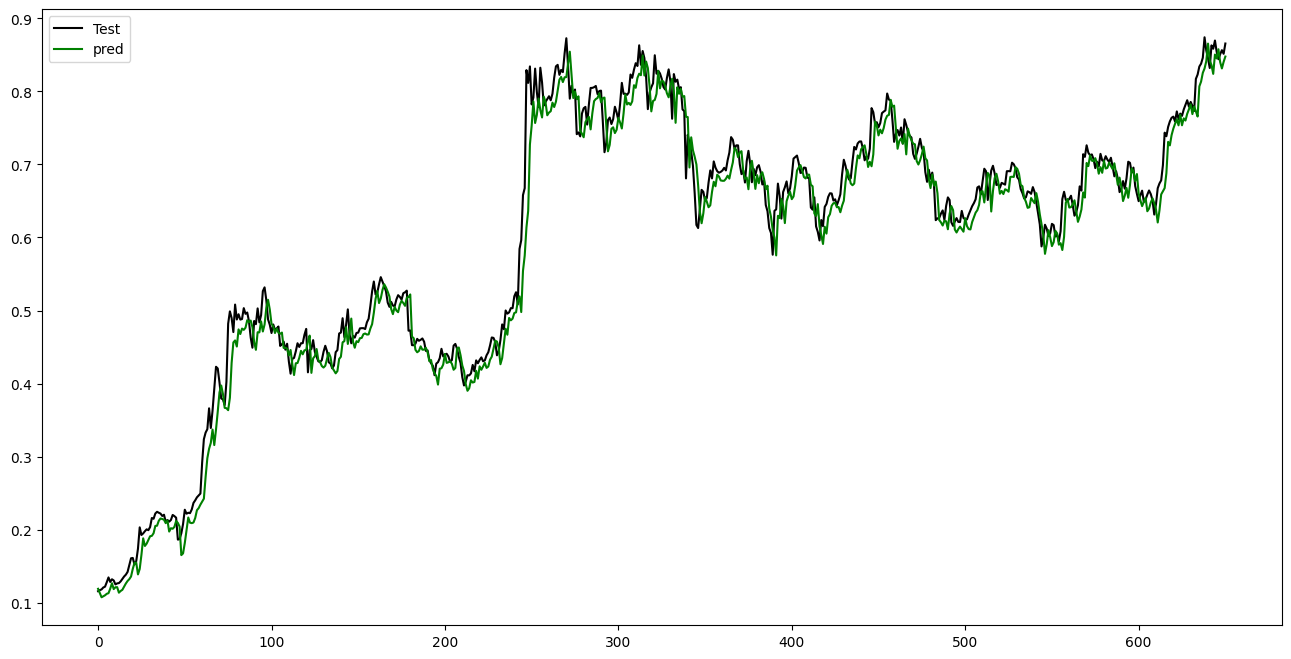

In [130]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label='pred')
plt.legend()
plt.show()

In [131]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mae


0.021426275535048004

In [132]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = mse**0.5
rmse

0.0296896686863332

## Predicting Stock Prices with Prophet 






In [133]:
from prophet import Prophet
import pandas as pd


In [134]:
stock_data=pd.read_excel(r"C:\Users\anant\Downloads\TATAMOTORS_Yahoo!2010.xlsx")


In [5]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,156.303482,164.040497,156.184769,163.535919,153.140793,27906448.0
1,2010-01-05,162.259598,167.147186,153.246277,160.686478,150.472473,23669317.0
2,2010-01-06,162.200241,162.932388,159.311234,160.933823,150.704086,14990820.0
3,2010-01-07,161.171280,161.923218,154.344498,155.432831,145.552795,22722030.0
4,2010-01-08,156.323273,159.251862,155.343781,156.283707,146.349564,16495776.0
...,...,...,...,...,...,...,...
3324,2023-06-12,567.000000,568.900024,560.650024,564.150024,564.150024,7599572.0
3325,2023-06-13,567.700012,571.049988,560.750000,562.200012,562.200012,12845897.0
3326,2023-06-14,566.000000,571.200012,564.000000,570.299988,570.299988,12713256.0
3327,2023-06-15,571.799988,575.000000,567.750000,568.450012,568.450012,12475759.0


In [135]:
data=stock_data[["Date","Close"]]

In [136]:
data.columns=["ds","y"]
data


,ds,y
0,2010-01-04,163.535919
1,2010-01-05,160.686478
2,2010-01-06,160.933823
3,2010-01-07,155.432831
4,2010-01-08,156.283707
...,...,...
3324,2023-06-12,564.150024
3325,2023-06-13,562.200012
3326,2023-06-14,570.299988
3327,2023-06-15,568.450012


In [137]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(data)
future_dates = prophet.make_future_dataframe(periods=365)
predictions = prophet.predict(future_dates)

23:02:18 - cmdstanpy - INFO - Chain [1] start processing
23:02:20 - cmdstanpy - INFO - Chain [1] done processing


In [138]:
from prophet.plot import plot_plotly

In [139]:
plot_plotly(prophet,predictions)

In [140]:
unknown_data = data.iloc[-245:]
data = data.iloc[:-245]

In [141]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(data)
future_dates = prophet.make_future_dataframe(periods=365)
predictions = prophet.predict(future_dates)

23:02:35 - cmdstanpy - INFO - Chain [1] start processing
23:02:37 - cmdstanpy - INFO - Chain [1] done processing


In [142]:
plot_plotly(prophet,predictions)

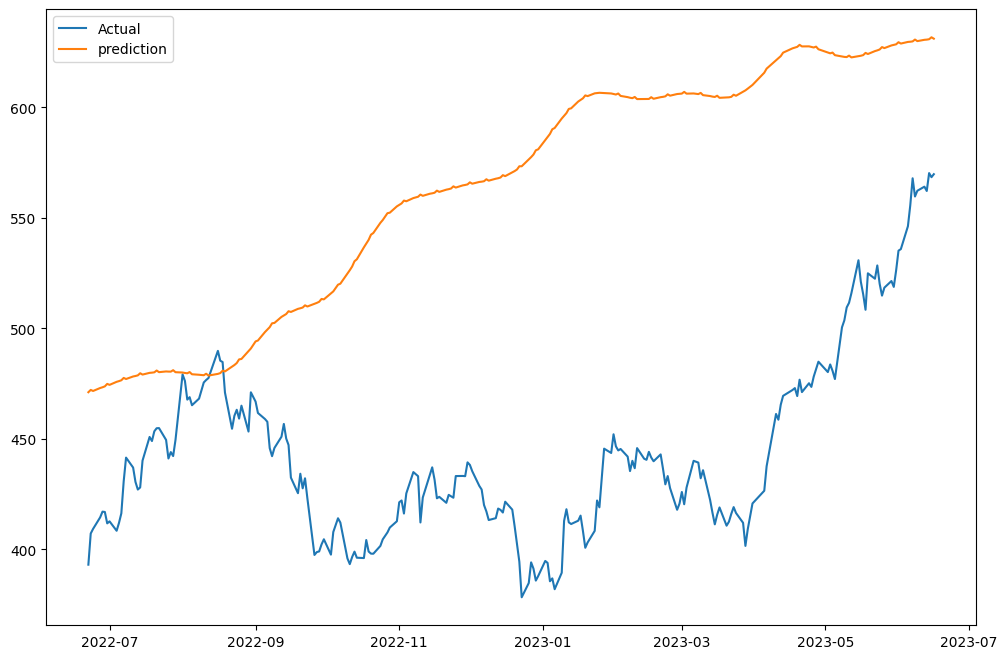

In [143]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
pred=predictions[predictions['ds'].isin(unknown_data["ds"])]

plt.plot(pd.to_datetime(unknown_data["ds"]),unknown_data['y'],label='Actual')
plt.plot(pd.to_datetime(unknown_data['ds' ]),pred["yhat"],label="prediction")
plt.legend()

## Stock Trading Strategy with Automated Trading 

In [144]:
import pandas as pd
import yfinance as yf

dfSPY=yf.download("^GSPC",start='2011-01-05', end='2023-06-27')
#dfSPY=yf.download("TATAMOTORS.NS",start='2011-01-05', end='2023-06-15')
#dfSPY=yf.download("AMZN",start='2011-01-05', end='2023-01-05')

dfSPY=dfSPY[dfSPY.High!=dfSPY.Low]
dfSPY.reset_index(inplace=True)
dfSPY.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-05,1268.780029,1277.630005,1265.359985,1276.560059,1276.560059,4764920000
1,2011-01-06,1276.290039,1278.170044,1270.430054,1273.849976,1273.849976,4844100000
2,2011-01-07,1274.410034,1276.829956,1261.699951,1271.500000,1271.500000,4963110000
3,2011-01-10,1270.839966,1271.520020,1262.180054,1269.750000,1269.750000,4036450000
4,2011-01-11,1272.579956,1277.250000,1269.619995,1274.479980,1274.479980,4050750000


In [145]:
import pandas_ta as ta
dfSPY['EMA']=ta.ema(dfSPY.Close, length=200)#sma ema
dfSPY['RSI']=ta.rsi(dfSPY.Close, length=2)
a=ta.adx(dfSPY.High, dfSPY.Low, dfSPY.Close, length=14)
dfSPY=dfSPY.join(a.ADX_14)
#dfSPY.ta.indicators()
#help(ta.adx)
dfSPY.dropna(inplace=True)
dfSPY.reset_index(inplace=True)
dfSPY[420:425]

,index,Date,Open,High,Low,Close,Adj Close,Volume,EMA,RSI,ADX_14
420,619,2013-06-24,1588.770020,1588.770020,1560.329956,1573.089966,1573.089966,4733660000,1522.325253,9.695884,22.552533
421,620,2013-06-25,1577.520020,1593.790039,1577.089966,1588.030029,1588.030029,3761170000,1522.979032,50.573803,23.801473
422,621,2013-06-26,1592.270020,1606.829956,1592.270020,1603.260010,1603.260010,3558340000,1523.777848,74.296111,24.129683
423,622,2013-06-27,1606.439941,1620.069946,1606.439941,1613.199951,1613.199951,3364540000,1524.667620,84.196714,23.670273
424,623,2013-06-28,1611.119995,1615.939941,1601.060059,1606.280029,1606.280029,4977190000,1525.479684,54.804761,23.450487


In [146]:
def addemasignal(df, backcandles):
    emasignal = [0]*len(df)
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row-backcandles, row+1):
            if df.High[i]>=df.EMA[i]:
                dnt=0
            if df.Low[i]<=df.EMA[i]:
                upt=0
        if upt==1 and dnt==1:
            #print("!!!!! check trend loop !!!!")
            emasignal[row]=3
        elif upt==1:
            emasignal[row]=2
        elif dnt==1:
            emasignal[row]=1
    df['EMASignal'] = emasignal

addemasignal(dfSPY,6)

In [147]:
def totalSignal(df, ADX):
    ordersignal=[0]*len(df)
    for i in range(0, len(df)):
        if  df.RSI[i]<=25 and ADX[i]>=20 and df.EMASignal[i]==2:
            ordersignal[i]=2
    df['ordersignal']=ordersignal

totalSignal(dfSPY, dfSPY.ADX_14)

In [148]:
dfSPY[dfSPY.ordersignal!=0]

,index,Date,Open,High,Low,Close,Adj Close,Volume,EMA,RSI,ADX_14,EMASignal,ordersignal
69,268,2012-01-30,1316.160034,1316.160034,1300.489990,1313.010010,1313.010010,3659010000,1267.269947,19.860575,29.549448,2,2
70,269,2012-01-31,1313.530029,1321.410034,1306.689941,1312.410034,1312.410034,4235550000,1267.719102,17.254994,29.737442,2,2
78,277,2012-02-10,1351.209961,1351.209961,1337.349976,1342.640015,1342.640015,3877580000,1273.390241,22.927251,37.629891,2,2
81,280,2012-02-15,1350.520020,1355.869995,1340.800049,1343.229980,1343.229980,4080340000,1275.609246,22.472603,38.324676,2,2
93,292,2012-03-05,1369.589966,1369.589966,1359.130005,1364.329956,1364.329956,3429480000,1285.748789,23.304479,35.908590,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,3049,2023-02-16,4114.750000,4136.540039,4089.489990,4090.409912,4090.409912,4143660000,4008.232448,17.536351,23.344939,2,2
2851,3050,2023-02-17,4077.389893,4081.510010,4047.949951,4079.090088,4079.090088,4045480000,4008.937499,13.349569,22.550117,2,2
2935,3134,2023-06-21,4380.009766,4386.220215,4360.140137,4365.689941,4365.689941,3709330000,4083.102217,18.663702,35.893930,2,2
2937,3136,2023-06-23,4354.169922,4366.549805,4341.339844,4348.330078,4348.330078,6053620000,4088.684732,19.274116,35.614562,2,2


## Visualization

In [149]:
import numpy as np
def pointpos(x):
    if x['ordersignal']==1:
        return x['High']+2e-3
    elif x['ordersignal']==2:
        return x['Low']-2e-3
    else:
        return np.nan

dfSPY['pointpos'] = dfSPY.apply(lambda row: pointpos(row), axis=1)

In [150]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

dfpl = dfSPY[1000:3200].copy()
#dfpl=dfpl.drop(columns=['level_0'])#!!!!!!!!!!
#dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close']),
                go.Scatter(x=dfpl.index, y=dfpl.EMA, line=dict(color='orange', width=2), name="EMA")])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=6, color="MediumPurple"),
                name="Signal")
#fig.update(layout_yaxis_range = [300,420])
fig.update_xaxes(rangeslider_visible=False)
fig.update_layout(autosize=False, width=2000, height=600,margin=dict(l=50,r=50,b=100,t=100,pad=4), paper_bgcolor="white")
fig.show()

In [151]:
dfpl = dfSPY[:].copy()
def SIGNAL():
    return dfpl.ordersignal

In [152]:
from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    initsize = 0.99
    mysize = initsize
    
    def init(self):
        super().init()
        self.signal = self.I(SIGNAL)

    def next(self):
        super().next()
        perc=0.02
        if len(self.trades)>0:
            if self.data.index[-1]-self.trades[-1].entry_time>=1000:
                self.trades[-1].close()
            if self.trades[-1].is_long and self.data.RSI[-1]>=75:
                self.trades[-1].close()
            elif self.trades[-1].is_short and self.data.RSI[-1]<=25:
                self.trades[-1].close()
        
        if self.signal==2 and len(self.trades)==0:  
            sl1 = min(self.data.Low[-1],self.data.Low[-2])*(1-perc)
            #tp1 = self.data.Close[-1]+(self.data.Close[-1] - sl1)*TPSLRatio
            #self.buy(sl=sl1, tp=tp1, size=self.mysize)
            self.buy(sl=sl1,size=self.mysize)

bt = Backtest(dfpl, MyStrat, cash=1000, margin=1/5, commission=.000)
stat = bt.run()
stat

C:\Users\anant\AppData\Local\Temp\ipykernel_8000\2310990574.py:29: UserWarning:

Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).

C:\Users\anant\AppData\Local\Temp\ipykernel_8000\2310990574.py:29: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



Start                                     0.0
End                                    2938.0
Duration                               2938.0
Exposure Time [%]                   18.339571
Equity Final [$]                  3761.799336
Equity Peak [$]                   4666.045566
Return [%]                         276.179934
Buy & Hold Return [%]              257.789186
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -46.348927
Avg. Drawdown [%]                   -5.958914
Max. Drawdown Duration                  935.0
Avg. Drawdown Duration              50.215686
# Trades                                122.0
Win Rate [%]                        71.311475
Best Trade [%]                       4.292443
Worst Trade [%]                     -2.833645
Avg. Trade [%]                    

In [153]:
bt.plot()

GridPlot(id='p2567', ...)